In [218]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns

In [219]:
df = pd.read_csv("snsdata.csv")
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [220]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [221]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


We can see that there is a problem with age information. The minimum age cannot be 0, 3 years or a maximum of 103 years old.

## Filling Age Column

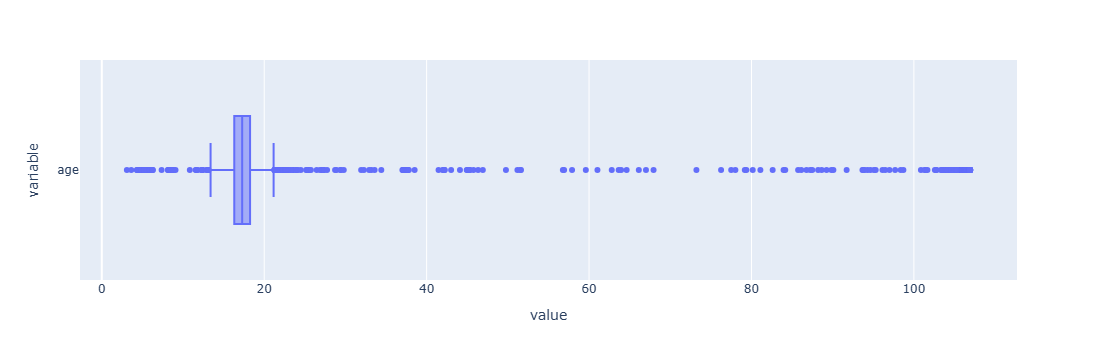

In [222]:
px.box(df.age, orientation = "h")

First of all, we will assign outliar values as NaN. We're going to do this by looking at the quantile.

In [223]:
# calculate quantiles
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)

iqr = q3 - q1

print("First quantile : ", q1)
print("Third quantile : ", q3)
print("Inter-Quantile Range : ", iqr)

First quantile :  16.312
Third quantile :  18.259
Inter-Quantile Range :  1.9469999999999992


In [224]:
# calculate fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print("Lower Fence : ", lower_fence)
print("Upper Fence : ", upper_fence)

Lower Fence :  13.391500000000002
Upper Fence :  21.179499999999997


In [225]:
# null values
df.age.isna().sum()

5086

In [226]:
# fill outliar values as nan
df.age = df.age.map(lambda x: x if lower_fence <= x <= upper_fence else np.nan)

In [227]:
# null values
df.age.isna().sum()

5447

In [228]:
median_age_by_gradyear = df.groupby(by = df.gradyear).age.median()
median_age_by_gradyear

gradyear
2006    18.6750
2007    17.6905
2008    16.7340
2009    15.7860
Name: age, dtype: float64

In [229]:
temp_age = df.gradyear.map(lambda x: median_age_by_gradyear[x])
temp_age

0        18.675
1        18.675
2        18.675
3        18.675
4        18.675
          ...  
29995    15.786
29996    15.786
29997    15.786
29998    15.786
29999    15.786
Name: gradyear, Length: 30000, dtype: float64

In [230]:
# null values
df.age.isna().sum()

5447

In [231]:
df.age = np.where(df.age.isna(), temp_age, df.age)

In [232]:
# null values
df.age.isna().sum()

0

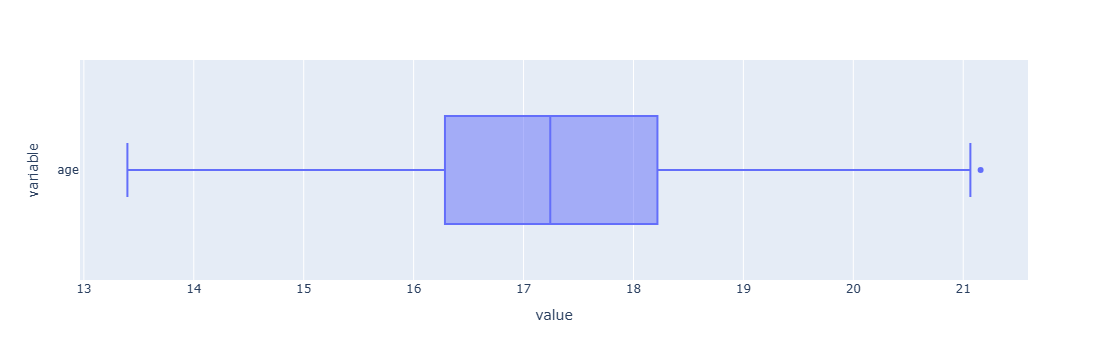

In [233]:
px.box(df.age, orientation = "h")

## Filling Gender Column

In [234]:
# Count of NaN Values 
df.gender.isna().sum()

2724

In [235]:
X = df.dropna().loc[:, "friends":]
X.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,69,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,142,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [236]:
y = df.dropna().gender
y

0        M
1        F
2        M
3        F
5        F
        ..
29995    M
29996    M
29997    M
29998    M
29999    F
Name: gender, Length: 27276, dtype: object

In [237]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoder = encoder.fit_transform(y)

scores = cross_val_score(XGBClassifier(), X, y_encoder, cv=5)
scores


array([0.82093109, 0.82713107, 0.83483043, 0.83794684, 0.84436297])

In [238]:
score

array([0.82093109, 0.82713107, 0.83483043, 0.83794684, 0.84436297])

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv = 5)

In [240]:
scores

array([0.80480205, 0.80659945, 0.81576535, 0.82493126, 0.83281393])

In [241]:
# splitting train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoder, test_size = 0.2, stratify = y, shuffle = True)

In [242]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [243]:
# fitting xgb classifier

classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

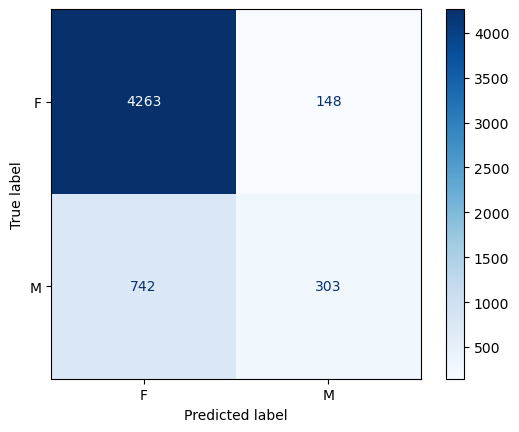

In [244]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

predictions = classifier.predict(X_test)

cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(cm, display_labels = ["F", "M"]).plot(cmap = plt.cm.Blues)

In [245]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4411
           1       0.67      0.29      0.41      1045

    accuracy                           0.84      5456
   macro avg       0.76      0.63      0.66      5456
weighted avg       0.82      0.84      0.81      5456



It has been determined that the model cannot predict men well.

## Imbalanced Learn Process- SMOTE

In [246]:
from imblearn.over_sampling import SMOTE

balancer = SMOTE(sampling_strategy = 0.5)

X_resampled, y_resampled = balancer.fit_resample(X_train, y_train)

In [247]:
np.unique(y_resampled, return_counts = True)

(array([0, 1]), array([17643,  8821], dtype=int64))

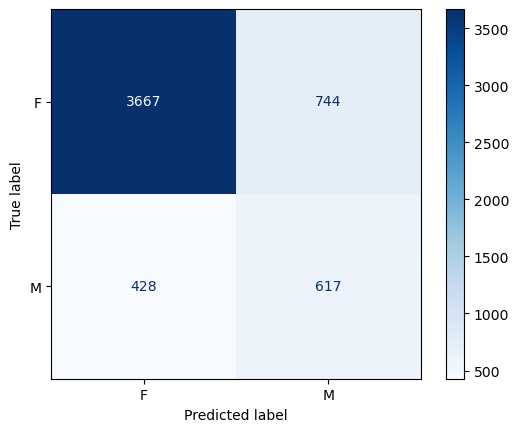

In [248]:
classifier.fit(X_resampled, y_resampled)

predictions = classifier.predict(X_test)

cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(cm, display_labels = ["F", "M"]).plot(cmap = plt.cm.Blues)

In [249]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4411
           1       0.45      0.59      0.51      1045

    accuracy                           0.79      5456
   macro avg       0.67      0.71      0.69      5456
weighted avg       0.81      0.79      0.80      5456



In [250]:
classifier.fit(X, y_encoder)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [251]:
X_nan = df.loc[df.gender.isna(), "friends":]
X_nan.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,10,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,135,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filling Na Values In Gender Column

In [252]:
preds = classifier.predict(X_nan)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [253]:
pred_labels = encoder.inverse_transform(preds)
np.unique(pred_labels, return_counts = True)

(array(['F', 'M'], dtype=object), array([2604,  120], dtype=int64))

In [254]:
df.gender[df.gender.isna()] = pred_labels

C:\Users\Hefes\AppData\Local\Temp\ipykernel_9108\3344106218.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Hefes\AppData\Local\Temp\ipykernel_9108\3344106218.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy

In [255]:
df.gender.isna().sum()

0

## Clustering Modelling With KMeans

In [256]:
from sklearn.cluster import KMeans

df = pd.get_dummies(df)
df.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,2006,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,True
1,2006,18.801,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
2,2006,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,False,True
3,2006,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
4,2006,18.995,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,True,False


In [257]:
X = df.loc[:, "age":]
X.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,18.982,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,True
1,18.801,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
2,18.335,69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,False,True
3,18.875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
4,18.995,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,True,False


In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.719660,0.008434,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.0,1.0
1,0.696341,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1.0,0.0
2,0.636305,0.083133,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0.0,1.0
3,0.705875,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1.0,0.0
4,0.721335,0.012048,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.350296,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.0,1.0
29996,0.308683,0.001205,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.0,1.0
29997,0.307653,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0625,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.0,1.0
29998,0.384179,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.0,1.0


In [259]:
X_scaled.gender_F = 0.707 * X_scaled.gender_F
X_scaled.gender_M = 0.707 * X_scaled.gender_M
X_scaled.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.719660,0.008434,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.000,0.707
1,0.696341,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.707,0.000
2,0.636305,0.083133,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0.000,0.707
3,0.705875,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0.707,0.000
4,0.721335,0.012048,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,0.707,0.000


In [260]:
cluster_model = KMeans(n_clusters = 6)
cluster_model.fit(X_scaled)

KMeans(n_clusters=6)

In [261]:
np.unique(cluster_model.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5]),
 array([5704, 5342, 1899, 5604, 5624, 5827], dtype=int64))

In [262]:
centers = pd.DataFrame(cluster_model.cluster_centers_, columns = X.columns)
centers

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.688418,0.031119,0.007019,0.011675,0.004606,0.008173,0.007189,0.003439,0.008919,0.003689,...,0.030899,0.013657,0.004567,0.003425,0.007122,0.007766,0.012032,0.003348,7.070000e-01,1.049161e-14
1,0.520815,0.029977,0.013283,0.030738,0.007890,0.000540,0.002420,0.002597,0.000957,0.017456,...,0.004391,0.008892,0.003682,0.002878,0.008169,0.007367,0.009477,0.003475,-1.276756e-14,7.070000e-01
2,0.450369,0.048392,0.026226,0.038939,0.014311,0.020342,0.024701,0.010305,0.060681,0.011334,...,0.158240,0.121442,0.045628,0.037296,0.017252,0.017057,0.032749,0.012750,7.070000e-01,-6.661338e-16
3,0.297839,0.040557,0.012901,0.012026,0.011342,0.013044,0.015674,0.005376,0.013310,0.004211,...,0.032604,0.015642,0.008734,0.007553,0.008362,0.007665,0.008111,0.003376,7.070000e-01,1.015854e-14
4,0.426486,0.038071,0.009779,0.012595,0.007904,0.011698,0.011873,0.003937,0.009954,0.003847,...,0.022578,0.009114,0.004967,0.003947,0.007539,0.007096,0.009136,0.002783,7.070000e-01,7.938095e-15
5,0.555459,0.037724,0.007902,0.010582,0.007527,0.009853,0.008786,0.004245,0.009219,0.002695,...,0.026284,0.010673,0.004066,0.003715,0.007684,0.007878,0.008869,0.002899,7.070000e-01,8.160139e-15


## In-cluster areas of interest

In [263]:
features = X.columns
features

Index(['age', 'friends', 'basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs', 'gender_F',
       'gender_M'],
      dtype='object')

In [264]:
features[centers.iloc[0,:] > centers.iloc[0,:].quantile(0.6)]

Index(['age', 'friends', 'football', 'cheerleading', 'cute', 'hot', 'dance',
       'music', 'rock', 'hair', 'dress', 'mall', 'shopping', 'clothes',
       'drunk', 'gender_F'],
      dtype='object')

In [265]:
centers.iloc[0, :].sort_values(ascending = False).head(15)

gender_F        0.707000
age             0.688418
friends         0.031119
shopping        0.030899
cute            0.018268
dress           0.017663
mall            0.014726
clothes         0.013657
dance           0.012067
drunk           0.012032
football        0.011675
music           0.010893
rock            0.009477
hair            0.009352
cheerleading    0.008919
Name: 0, dtype: float64

<Axes: >

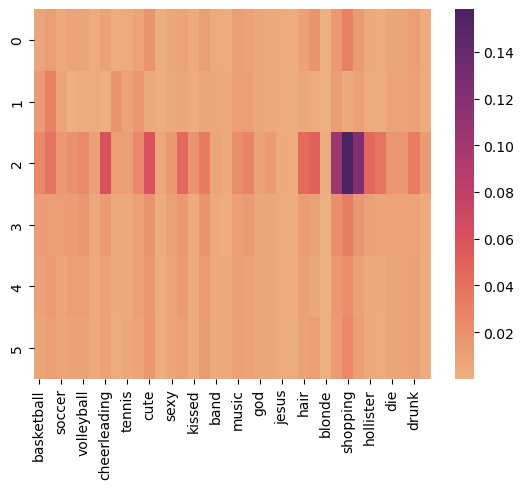

In [266]:
sns.heatmap(centers.loc[:,"basketball": "drugs"],  cmap = "flare")